# Feature importance - Figure1

In [1]:
from load_data import load
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import numpy as np

### 1 - Load data

In [2]:
(df, diff, dataX, dataY) = load()

0        True
1        True
2        True
3        True
4        True
        ...  
2208    False
2209    False
2210    False
2211    False
2212    False
Name: Pressure (bar), Length: 2213, dtype: bool
2213


### 2 - Prepare data for training

In [3]:
#generate all configurations
conf_spp = df[["Speed (mm/s)", "Pressure (bar)", "wt% PPF"]].groupby(["Speed (mm/s)", "Pressure (bar)", "wt% PPF"]).size().reset_index()
combos = conf_spp[["Speed (mm/s)", "Pressure (bar)", "wt% PPF"]].values

In [4]:
#extract data in the form for training
X_train = dataX[[ "viscosity", "Spacing (mm)", "Speed (mm/s)", "Pressure (bar)", "Layer #"]].to_numpy()
Y_train = dataY["material accuracy(%)"].to_numpy()

### 3 - Train

In [5]:
regr = RandomForestRegressor(max_depth=6, random_state=0,n_estimators=100)
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### 4 - Extract features and plot them

Feature ranking:
1. feature 2 (0.510071)
2. feature 0 (0.241523)
3. feature 3 (0.145407)
4. feature 4 (0.068581)
5. feature 1 (0.034418)


<Figure size 432x288 with 0 Axes>

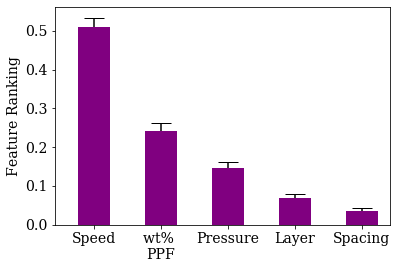

In [23]:
import matplotlib
#------------------------------CODE TO EXTRACT AND PLOT THE FEATURES------------------------------------#
X = X_train
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_labs = ["wt% \nPPF", "Spacing", "Speed", "Pressure", "Layer"]
feature_lab_ord = []

for i in indices:
    feature_lab_ord.append(feature_labs[i])

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
plt.figure()
fig, ax = plt.subplots()
ax.set_axisbelow(True)
plt.grid(False)
#plt.title("Feature importances")
x_spacing = np.array(range(X.shape[1]))*1.7
plotline1, caplines1, barlinecols1 = ax.errorbar(
        x_spacing, importances[indices], yerr=std[indices], lolims=True,
        capsize = 0, ls='None', color='k')
caplines1[0].set_marker('_')
caplines1[0].set_markersize(20)
plt.bar(x_spacing, importances[indices],
        color='purple',align="center")
plt.xticks(x_spacing, feature_lab_ord)
plt.xlim([-1, X.shape[1]*1.5])
plt.ylabel("Feature Ranking")

plt.savefig("feature_importance.eps")
plt.show()

In [13]:
np.array(range(X.shape[1]))*1.2

array([0. , 1.2, 2.4, 3.6, 4.8])